In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

In [2]:
import jax
from jax import numpy as jnp
import netket as nk
from netket.operator.spin import sigmax, sigmaz

/Users/megan/miniconda3/envs/netket/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import sys
sys.path.append('..')
from helpers import try_load_dict
from dset_helpers import make_data

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Helvetica"
})

bigger_font_size=10
column_width = 3.375
double_stack=(column_width,column_width)
double_stack_supplement=(2*column_width,2.5*column_width)

red = plt.get_cmap("Reds")
blue = plt.get_cmap("Blues")
green = plt.get_cmap("Greens")

data_prepend = './'
data_prepend = 'public_data/'

# data sets

In [5]:
def convert_samples_to_index(samples):
    binary_vectors = (samples + 1) // 2 
    powers_of_two = 2 ** jnp.arange(samples.shape[-1])[::-1]  
    indices = jnp.dot(binary_vectors, powers_of_two) 
    return indices

In [6]:
N = 16
h = -1.0

# Hamiltonian & Exact Energy
graph = nk.graph.Chain(length=N, pbc=True)
hi = nk.hilbert.Spin(s=0.5,N=N)
ha = sum([h*sigmax(hi,i) for i in range(N)])
ha += sum([-sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
E_gs, gs = nk.exact.lanczos_ed(ha,compute_eigenvectors=True)


In [7]:
seed = 10
split = 'probs'
data_key = jax.random.PRNGKey(seed)


NUM HIGH PROB SAMPLES IN TEST: 0
1.5258789062500095e-05
8.599643492334437e-08
NUM HIGH PROB SAMPLES IN TEST: 0
1.5258789062500095e-05
6.439280084735036e-07


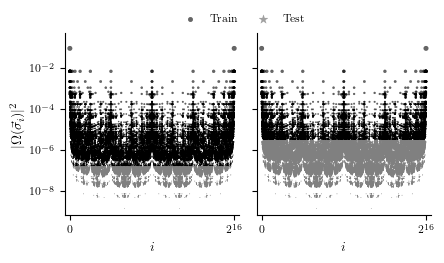

In [8]:
fig,ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(1.4*column_width,0.7*column_width))
fig.subplots_adjust(wspace=0.1)
ax0 = ax[0]
ax1 = ax[1]

## datasets
test_frac=0.25
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)
all_y = np.exp(target_logpsis)**2
print(np.mean(all_y))
print(np.mean(y_test))
ax0.scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
ax0.scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
ax0.set_xticks([0,2**16])
ax0.set_xticklabels([r'$0$',r'$2^{16}$'])
ax0.set_ylabel(r"$\vert \Psi_\mathrm{exact}(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax0.set_ylabel(r"$\vert \Omega(\vec{\sigma}_i)\vert^2$",fontsize=bigger_font_size)
ax0.set_yscale('log')
ax0.set_xlim(-2000,2**16+2000)
ax0.set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)
ax0.set_xlabel(r"$i$",fontsize=bigger_font_size)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

test_frac=0.75
x_train, x_test, y_train, y_test, target_logpsis = make_data(h, gs, data_key,
                                                             how_to_split=split,
                                                             test_frac=test_frac,
                                                             save=False,
                                                             save_train_inds=False)
all_y = np.exp(target_logpsis)**2
print(np.mean(all_y))
print(np.mean(y_test))
ax1.scatter(convert_samples_to_index(x_train), y_train, marker = ".", s=100*np.cbrt(y_train), linewidth=0.2, color='k',alpha=0.6,label=r'$\mathrm{Train}$',zorder=1)
ax1.scatter(convert_samples_to_index(x_test), y_test, marker = "*", s=100*np.cbrt(y_test), linewidth=0.2, color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$',zorder=0)
ax1.set_xticks([0,2**16])
ax1.set_xticklabels([r'$0$',r'$2^{16}$'])
ax1.set_yscale('log')
ax1.set_xlim(-2000,2**16+2000)
ax1.set_ylim(0.5*min(min(y_test),min(y_train)),5*10**-1)
ax1.set_xlabel(r"$i$",fontsize=bigger_font_size)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]
train = plt.scatter([0], [0], marker='.',linestyle='None',linewidth=0.2,s=100*np.cbrt(np.max(y_train)), color='k',alpha=0.6,label=r'$\mathrm{Train}$')
test = plt.scatter([0], [0], marker='*',linestyle='None',linewidth=0.2,s=100*np.cbrt(np.max(y_train)), color='grey',facecolors='grey',alpha=0.75,label=r'$\mathrm{Test}$')

handles = [
    train,test]
labels = [
          train.get_label(),test.get_label()]
fig.legend(handles=handles, labels=labels,loc='lower center',ncol=2,columnspacing=1.2,frameon=False,bbox_to_anchor=(0.5,0.875))

plt.savefig(f'./figures/N16_data.pdf',bbox_inches='tight')
plt.show()


#### Figure 8, supplement

In [9]:
exp_name = 'Jul23'
N = 16

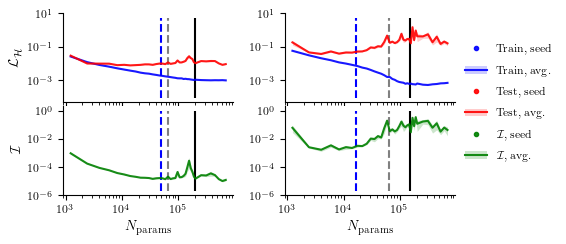

In [11]:
fig,ax = plt.subplots(2, 2, sharex='col', figsize=(1.5*column_width,0.7*column_width))
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.3)
ax0 = ax[0,0]
ax1 = ax[1,0]
ax2 = ax[0,1]
ax3 = ax[1,1]

seeds = np.arange(10,101,10)
show_seeds = False

# 75:25 splitting ####################################################
frac_test = 0.25
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax0.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax0.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax0.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax0.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax0.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax0.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax1.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)


path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax1.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax1.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax0.vlines(2**N,8*10**-5,5*10**0,linestyle='--',color='grey',zorder=-1)
ax0.vlines(2**N*frac_train,8*10**-5,5*10**0,linestyle='--',color='b',zorder=-1)
ax0.vlines(2*10**5,8*10**-5,5*10**0,linestyle='-',color='k',zorder=-1)

ax1.vlines(2**N,2*10**-6,10**0,linestyle='--',color='grey',zorder=-1)
ax1.vlines(2**N*frac_train,2*10**-6,10**0,linestyle='--',color='b',zorder=-1)
ax1.vlines(2*10**5,2*10**-6,10**0,linestyle='-',color='k',zorder=-1)

######################################################################


# 25:75 splitting ####################################################
frac_test = 0.75
frac_train = 1-frac_test

if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        train_losses_dict = try_load_dict(path + 'train_losses.pkl')
        test_losses_dict = try_load_dict(path + 'test_losses.pkl')
        x = []
        train_losses = []
        test_losses = []
        for key,item in x_dict.items():
            if key in train_losses_dict.keys():
                x.append(item)
                train_losses.append(train_losses_dict[key][-1]/frac_train)
                test_losses.append(test_losses_dict[key][-1]/frac_test)
        ax2.scatter(x,train_losses,marker='.',s=8,color=blue(seed/max(seeds)),alpha=0.9)
        ax2.scatter(x,test_losses,marker='.',s=8,color=red(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/'
x = np.load(path + 'params_Hilbert_ratio.npy') * 2**N
train_losses = np.load(path + 'final_train_losses.npy')[:len(x)]
train_var = np.load(path + 'final_train_losses_var.npy')[:len(x)]
train_err = np.sqrt(train_var/frac_train)/np.sqrt(10)
test_losses = np.load(path + 'final_test_losses.npy')[:len(x)]
test_var = np.load(path + 'final_test_losses_var.npy')[:len(x)]
test_err = np.sqrt(test_var/frac_test)/np.sqrt(10)
ax2.errorbar(x,train_losses/frac_train,
            marker='None',linestyle='-',
            c='b',mfc="white",alpha=0.9)
ax2.fill_between(x,(train_losses/frac_train)-train_err,(train_losses/frac_train)+train_err,linewidth=0,color='b',alpha=0.2)
ax2.errorbar(x,test_losses/frac_test,
            marker='None',linestyle='-',
            c='r',mfc="white",alpha=0.9)
ax2.fill_between(x,(test_losses/frac_test)-test_err,(test_losses/frac_test)+test_err,linewidth=0,color='r',alpha=0.2)
  
if show_seeds:
    for seed in seeds:
        path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/seed_{seed}/'
        x_dict = try_load_dict(path + 'num_params.pkl')
        fidelities_dict = try_load_dict(path + 'fidelities.pkl')
        x = []
        fidelities = []
        for key,item in x_dict.items():
            if key in fidelities_dict.keys():
                x.append(item)
                fidelities.append(1-fidelities_dict[key][-1])
        ax3.scatter(x,fidelities,marker='.',s=8,color=green(seed/max(seeds)),alpha=0.9)

path = data_prepend + f'{exp_name}/IsingChain_h-1.0_N16/TestTrain/testSize{frac_test}_probs/hellinger/bs_1024/'
x = np.load(path + 'params_Hilbert_ratio.npy')*2**N
fidelities = np.load(path + 'final_fidelities.npy')[:len(x)]
fidelities_var = np.load(path + 'final_fidelities_var.npy')[:len(x)]
fidelities_err = np.sqrt(fidelities_var)/np.sqrt(10)
ax3.errorbar(x,1-fidelities,
             marker='None',linestyle='-',
             c='green',mfc="white",alpha=0.9)
ax3.fill_between(x,(1-fidelities)-fidelities_err,(1-fidelities)+fidelities_err,linewidth=0,color='green',alpha=0.2)

ax2.vlines(2**N,8*10**-5,5*10**0,linestyle='--',color='grey',zorder=-1)
ax2.vlines(2**N*frac_train,8*10**-5,5*10**0,linestyle='--',color='b',zorder=-1)
ax2.vlines(1.5*10**5,8*10**-5,5*10**0,linestyle='-',color='k',zorder=-1)

ax3.vlines(2**N,2*10**-6,10**0,linestyle='--',color='grey',zorder=-1)
ax3.vlines(2**N*frac_train,2*10**-6,10**0,linestyle='--',color='b',zorder=-1)
ax3.vlines(1.5*10**5,2*10**-6,10**0,linestyle='-',color='k',zorder=-1)

######################################################################

ax0.set_yscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax0.set_ylabel(r'$\mathcal{L}_\mathcal{H}$',fontsize=bigger_font_size)
ax1.set_ylabel(r'$\mathcal{I}$',fontsize=bigger_font_size)
ax1.set_xscale('log')
ax1.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)
ax3.set_xscale('log')
ax3.set_xlabel(r'$N_\mathrm{params}$',fontsize=bigger_font_size)

ax0.set_ylim(5*10**-5,10**1)
ax1.set_ylim(10**-6,2*10**0)
ax2.set_ylim(5*10**-5,10**1)
ax3.set_ylim(10**-6,2*10**0)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

train_patch = mpatches.Patch(color='blue',alpha=0.2,linewidth=0)
test_patch = mpatches.Patch(color='red',alpha=0.2,linewidth=0)
train_line = plt.Line2D([0], [0], color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{avg.}$')
test_line = plt.Line2D([0], [0], color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{avg.}$')    
train_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='blue',alpha=0.9,label=r'$\mathrm{Train},$ $\mathrm{seed}$')
test_marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='red',alpha=0.9,label=r'$\mathrm{Test},$ $\mathrm{seed}$')
line = plt.Line2D([0], [0], color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{avg.}$')
patch = mpatches.Patch(color='green',alpha=0.2,linewidth=0)
marker = plt.Line2D([0], [0], marker='.',linestyle='None',markersize=6, color='green',alpha=0.9,label=r'$\mathcal{I},$ $\mathrm{seed}$')
handles = [marker, (patch,line)]
labels = [marker.get_label(),line.get_label()]

handles = [
    train_marker, (train_patch,train_line),
    test_marker, (test_patch,test_line),
    marker, (patch,line)]
labels = [train_marker.get_label(),train_line.get_label(),
          test_marker.get_label(),test_line.get_label(),
          marker.get_label(),line.get_label()
          ]
fig.legend(handles=handles, labels=labels,loc='center left',ncol=1,columnspacing=1,frameon=False,bbox_to_anchor=(0.9,0.5),labelspacing=1)

plt.savefig(f'./figures/doubleDescent_probs_N16.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()